In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Pod_Fault_Data_CSV/PF_CPU_Cluster_VsPod-Frontend.csv')
df.head(10)

CPU_Cluster  CPU_Pod_Frontend
0      0.00175          0.014300
1      0.00179          0.109000
2      0.00223          1.470000
3      0.42200          0.002500
4      1.70000          0.000292
5      1.70000          0.000321
6      1.69000          0.000322
7      1.68000          0.000282
8      0.00179          0.000304
9      0.00171          0.000280

In [3]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['CPU_Cluster','CPU_Pod_Frontend'])

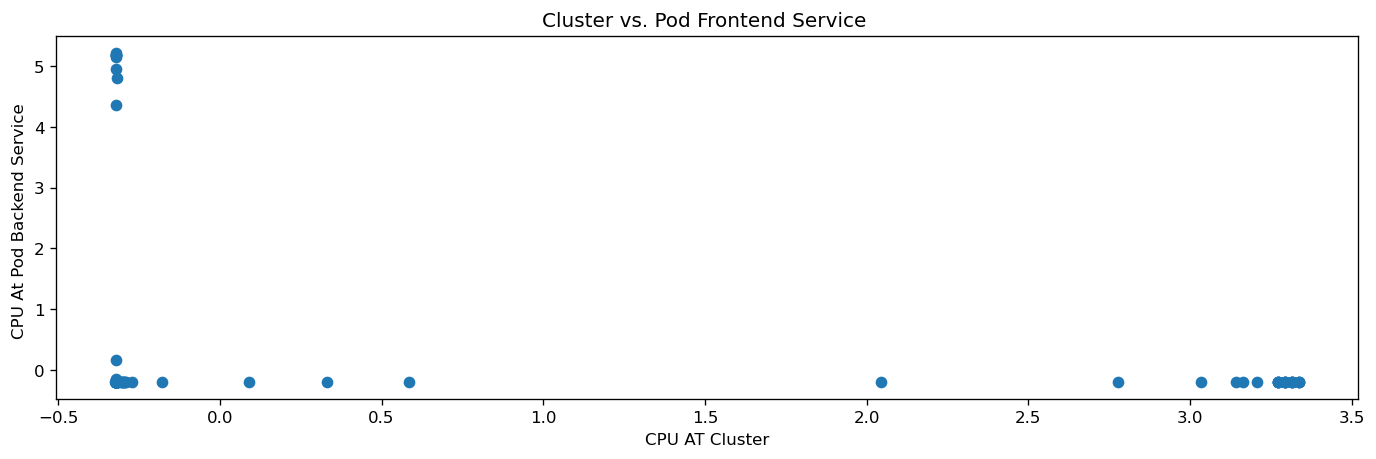

In [4]:
plt.figure(figsize=(14,4))
plt.scatter(df.CPU_Cluster, df.CPU_Pod_Frontend)
plt.xlabel('CPU AT Cluster')
plt.ylabel('CPU At Pod Backend Service ')
plt.title('Cluster vs. Pod Frontend Service ')
plt.show()

In [5]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

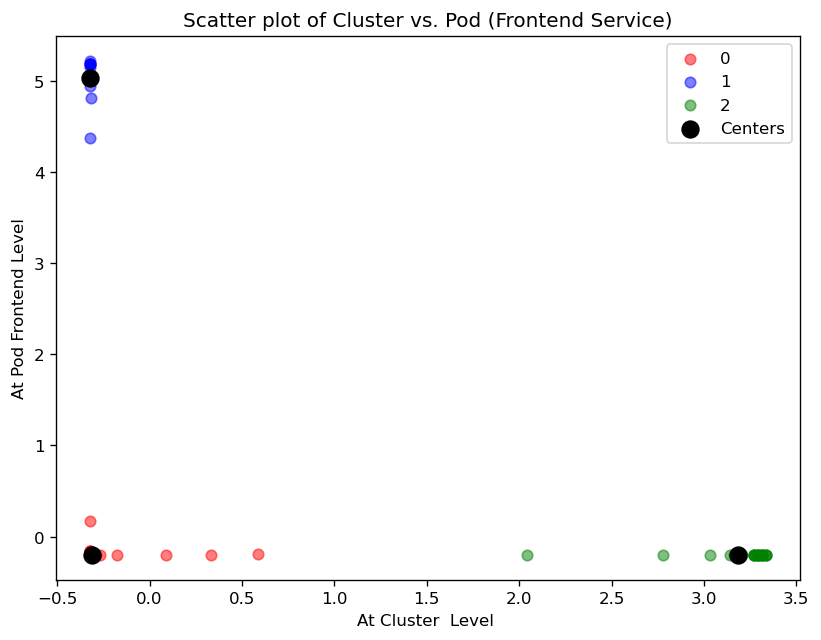

In [6]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Cluster, df[model.labels_==i].CPU_Pod_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Cluster  Level ")
plt.ylabel("At Pod Frontend Level")
plt.title('Scatter plot of Cluster vs. Pod (Frontend Service)')
plt.legend()
plt.show()

In [7]:
def distance_from_center(CPU_Cluster, CPU_Pod_Frontend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Cluster CPU Usage: the standardized CPU Usage of the data point 
    :param float Pod Cpu Usage: the standardized cpu at Pod of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Cluster_CPU =  model.cluster_centers_[label,0]
    Pod_CPU_Frontend =  model.cluster_centers_[label,1]
    distance = np.sqrt((CPU_Cluster - Cluster_CPU) ** 2 + (CPU_Pod_Frontend - Pod_CPU_Frontend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.CPU_Cluster, df.CPU_Pod_Frontend, df.label)

In [8]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     CPU_Cluster  CPU_Pod_Frontend  label  distance
1      -0.320587          0.169979      0      0.37
2      -0.319639          4.809022      1      0.22
3       0.584379         -0.193032      0      0.89
49      0.332408         -0.200572      0      0.64
65      2.044523         -0.200674      2      1.14
68      0.091204         -0.200664      0      0.40
140    -0.320716          5.218049      1      0.19
145    -0.320608          5.183963      1      0.16
166    -0.320694          4.365910      1      0.66
232     2.776749         -0.200599      2      0.41


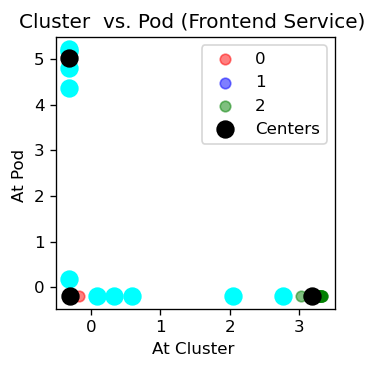

In [9]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Cluster, df[model.labels_==i].CPU_Pod_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.CPU_Cluster, outliers.CPU_Pod_Frontend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("At Pod ")
plt.title('Cluster  vs. Pod (Frontend Service) ')
plt.legend()
plt.show()